In this notebook, we produce the list of visits (obsID, fID, band) for WFD visits that overlap (either fully or partically) in the DDF region for Run 1.

A csv file with relevant info is saved for each visit. Also, gifs are produced to check the a few sets of visits in each case.

The code here is parallel to that in `DC2_Run2_visitsLst.ipynb`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import healpy as hp
from copy import deepcopy
import time

In [2]:
repoDir = os.getcwd()
print(repoDir)

/global/u2/a/awan/LSST/lsstRepos/DC2_visitList/DC2visitGen/notebooks


In [3]:
os.chdir('/global/u2/a/awan/LSST/lsstRepos/DC2_visitList/')
!python setup.py install --user

running install
running build
running build_py
running install_lib
running install_egg_info
Removing /global/homes/a/awan/.local/lib/python3.6/site-packages/dc2visitgen-0.1-py3.6.egg-info
Writing /global/homes/a/awan/.local/lib/python3.6/site-packages/dc2visitgen-0.1-py3.6.egg-info


In [4]:
# simdata datapath
dbpath = '/global/cscratch1/sd/awan/dbs_old_unzipped/minion_1016_desc_dithered_v3.db'

In [5]:
# set up
pointingRACol = 'descDitheredRA'
pointingDecCol = 'descDitheredDec'
simDataTag = 'minion1016_v3'
nside = 1024

# where the data will be saved
tag = 'DC2_Run2_Visits_nside%s'%(nside)
outDir = '%s/../%s/'%(repoDir, tag)
outDir_gifs = '/global/homes/a/awan/desc/DC2_GIFS/%s/'%tag

#### Set up params

In [6]:
regionCorners= {}
regionCorners['WFD']= [[71.46, -27.25], [73.79, -44.33], [49.92, -44.33], [52.25, -27.25]]
regionCorners['DD']= [[53.764, -27.533], [53.771, -28.667], [52.479, -28.667], [52.486, -27.533]]

{'WFD': [[71.46, -27.25], [73.79, -44.33], [49.92, -44.33], [52.25, -27.25]], 'DD': [[53.764, -27.533], [53.771, -28.667], [52.479, -28.667], [52.486, -27.533]]}


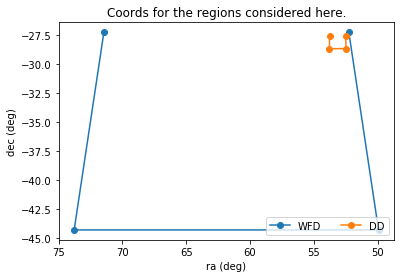

In [7]:
# plot the regions to check whats up
def plot(regionCorners, xy= False):
    for key in regionCorners.keys():    
        xs, ys= [], []
        for x, y in regionCorners[key]:
            xs.append(x)
            ys.append(y)
        plt.plot(xs, ys, 'o-', label= key)
    plt.gca().invert_xaxis()
    plt.legend(loc="lower right", ncol= 2)
    plt.title('Coords for the regions considered here.')
    if xy:
        plt.xlabel('x (deg)')
        plt.ylabel('y (deg)')
    else:
        plt.xlabel('ra (deg)')
        plt.ylabel('dec (deg)')
    plt.show()
 
# plot
print(regionCorners)
plot(regionCorners)

#### Find the visits.

In [8]:
from dc2visitgen import getDC2VisitList

In [9]:
simdata, regionPixels, obsIDsList, fIDsList, bandList= {}, {}, {}, {}, {}

In [10]:
# get WFD visits that fall in the WFD footprint
startTime = time.time()
surveyRegionTag = 'WFD'

out = getDC2VisitList(dbpath, simDataTag, surveyRegionTag, pointingRACol, pointingDecCol,
                      outDir, nside, regionCorners['DD'],
                      filters=['u', 'g', 'r', 'i', 'z', 'y'], outFileTag='WFDvisitsInWFD_subsetOverlapDDF')

simdata[surveyRegionTag], regionPixels[surveyRegionTag], obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag] = out

print('\nTime taken: %.3f (min)'%((time.time()-startTime)/60.))

###### lsst.sims.maf.__version__: 2.9.0.sims

Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes
Querying database Summary with no constraint for columns ['descDitheredDec', 'descDitheredRA', 'fiveSigmaDepth'].
Found 2194905 visits
Running:  ['pixelGrid']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Finding the visit list.
Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes

##Total number of unique visits in the region (across all bands): 2253

Total number of unique visits in the region for u band: 156
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for g band: 214
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for r band: 488
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the region for i band: 502
fIDs: [1309 1331 1419 1427 1445 1546 1566]

Total number of unique visits in the 

#### Plot the sims for checks.

In [11]:
from dc2visitgen import DC2VisitsSim

In [12]:
ras, decs = [], []
for key in regionCorners:
    for i in regionCorners[key]:
        ras.append(i[0])
        decs.append(i[1])
    
minRA, maxRA = min(ras), max(ras)
minDec, maxDec = min(decs), max(decs)

In [13]:
# read in the pixels for DD and WFD from before.
import pandas as pd
mainDir = '/global/homes/a/awan/LSST/lsstRepos/DC2_visitList/DC2visitGen/DC2_Run2_Visits_nside1024/regionPixels'
regionPixels['DD'] = pd.read_csv('%s/DC2RegionPixels_minion1016_v3_DDvisits_nside1024_DDvisitsInuDD.csv'%mainDir, skiprows=0)
regionPixels['DD'] = regionPixels['DD'].values.flatten()

regionPixels['WFD'] = pd.read_csv('%s/DC2RegionPixels_minion1016_v3_WFDvisits_nside1024_WFDvisitsInWFD.csv'%mainDir, skiprows=0)
regionPixels['WFD'] = regionPixels['WFD'].values.flatten()

In [14]:
surveyRegionTag= 'WFD'
DC2VisitsSim(outDir_gifs, 'WFD_overlapDD_test', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
             obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
             regionPixels_WFD=regionPixels['WFD'], regionPixels_DD=regionPixels['DD'],
             nside=nside, obsHistIndMin=0, obsHistIndMax=100, dpi=60,
             minRA=minRA, maxRA=maxRA, minDec=minDec, maxDec=maxDec)

Saved hIDs_0-100Index_WFD_overlapDD_test_nside1024.gif


In [15]:
surveyRegionTag= 'WFD'
DC2VisitsSim(outDir_gifs, 'WFD_overlapDD_test', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
             obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
             regionPixels_WFD=regionPixels['WFD'], regionPixels_DD=regionPixels['DD'],
             nside=nside, obsHistIndMin=1000, obsHistIndMax=1100, dpi=60,
             minRA=minRA, maxRA=maxRA, minDec=minDec, maxDec=maxDec)

Saved hIDs_1000-1100Index_WFD_overlapDD_test_nside1024.gif
